In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
model_features = pd.read_csv("ihc-files/ihc-ht-st-features.csv")
model_features

,Ki67,braf,PDL epitel,PDL lenfos,vegf,cd34,cd34 score,P53
0,50,Negative,Negative,Negative,20,47,2,15
1,40,Negative,Negative,Negative,30,39,2,10
2,50,Negative,Negative,Negative,50,50,3,20
3,50,Negative,Negative,Weak,40,63,3,5
4,30,Negative,Negative,Weak,75,50,2,25
...,...,...,...,...,...,...,...,...
216,65,Negative,Negative,Weak,35,54,2,15
217,70,Negative,Negative,Negative,10,30,1,40
218,75,Negative,Negative,Intermediate,55,37,2,30
219,70,Negative,Negative,Intermediate,50,36,2,35


In [3]:
labels_df = pd.read_csv("ihc-files/ihc-ht-st-labels.csv")
labels_df

,Subtype
0,hyperplastic
1,hyperplastic
2,hyperplastic
3,hyperplastic
4,hyperplastic
...,...
216,tubular
217,tubular
218,tubular
219,tubular


In [5]:
target_names = list(labels_df.Subtype)
target = []
for i in target_names:
    if i == 'hyperplastic':
        target.append(0)
    else:
        target.append(1)

In [6]:
len(target)

221

In [7]:
labels_df["Target"] = target
labels_df

,Subtype,Target
0,hyperplastic,0
1,hyperplastic,0
2,hyperplastic,0
3,hyperplastic,0
4,hyperplastic,0
...,...,...
216,tubular,1
217,tubular,1
218,tubular,1
219,tubular,1


In [8]:
dummies = pd.get_dummies(model_features[["braf", "PDL epitel", "PDL lenfos"]], drop_first=True)
dummies 

,braf_Weak,braf_kuvvetli,PDL epitel_Negative,PDL epitel_Weak,PDL lenfos_Negative,PDL lenfos_Weak,PDL lenfos_kuvvetli
0,0,0,1,0,1,0,0
1,0,0,1,0,1,0,0
2,0,0,1,0,1,0,0
3,0,0,1,0,0,1,0
4,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...
216,0,0,1,0,0,1,0
217,0,0,1,0,1,0,0
218,0,0,1,0,0,0,0
219,0,0,1,0,0,0,0


In [9]:
dummies["Ki67"] = model_features.Ki67
dummies["vegf"] = model_features.vegf
dummies["cd34"] = model_features.cd34
dummies["cd34 score"] = model_features["cd34 score"]
dummies["P53"] = model_features.P53
dummies

,braf_Weak,braf_kuvvetli,PDL epitel_Negative,PDL epitel_Weak,PDL lenfos_Negative,PDL lenfos_Weak,PDL lenfos_kuvvetli,Ki67,vegf,cd34,cd34 score,P53
0,0,0,1,0,1,0,0,50,20,47,2,15
1,0,0,1,0,1,0,0,40,30,39,2,10
2,0,0,1,0,1,0,0,50,50,50,3,20
3,0,0,1,0,0,1,0,50,40,63,3,5
4,0,0,1,0,0,1,0,30,75,50,2,25
...,...,...,...,...,...,...,...,...,...,...,...,...
216,0,0,1,0,0,1,0,65,35,54,2,15
217,0,0,1,0,1,0,0,70,10,30,1,40
218,0,0,1,0,0,0,0,75,55,37,2,30
219,0,0,1,0,0,0,0,70,50,36,2,35


In [10]:
X = dummies
y = labels_df["Target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
X.isna().sum()

braf_Weak              0
braf_kuvvetli          0
PDL epitel_Negative    0
PDL epitel_Weak        0
PDL lenfos_Negative    0
PDL lenfos_Weak        0
PDL lenfos_kuvvetli    0
Ki67                   0
vegf                   0
cd34                   0
cd34 score             0
P53                    0
dtype: int64

In [12]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [13]:
clf.score(X_train, y_train)

1.0

In [14]:
y_preds = clf.predict(X_test)
y_preds

array([1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1], dtype=int64)

In [15]:
clf.score(X_test, y_test)

0.7555555555555555

In [16]:
clf_cv_score = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
clf_cv_score

array([0.65217391, 0.72727273, 0.81818182, 0.77272727, 0.95454545,
       0.77272727, 0.86363636, 0.95454545, 0.81818182, 0.90909091])

In [17]:
clf_cv_score.mean()

0.8243083003952568

In [18]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.64      0.50      0.56        14
           1       0.79      0.87      0.83        31

    accuracy                           0.76        45
   macro avg       0.72      0.69      0.70        45
weighted avg       0.75      0.76      0.75        45



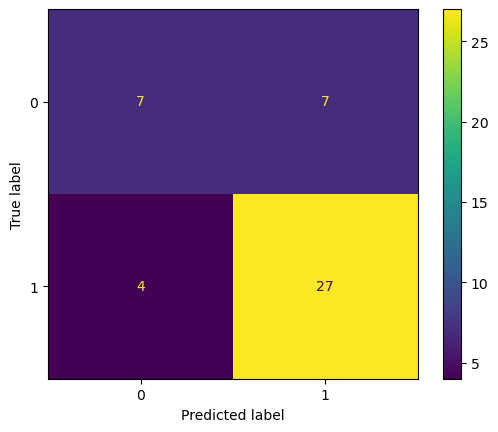

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_preds, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()